# Performs (multivariate) Dynamic Time Wrapping to check the similarites between the time 

In [2]:
import pandas as pd
from tslearn.metrics import dtw
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

C:\Users\anton\AppData\Roaming\Python\Python39\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
battery_paths = 'processed_datasets/All_Data_linear_C.csv'
df = pd.read_csv(battery_paths)

dfs_dict = {}

# For each battery in the dataset, create a dataframe and add it to the dictionary
for bat in df['battery_name'].unique():
    dfs_dict[bat] = df.query('battery_name == @bat')

# For each dfs drop the colums comment, type, battery_name, dateTime, endTime, timeRange, gt, cycle, capacity (Ah), soh and soh_interpolated
col_drop = ['comment', 'type', 'battery_name', 'dateTime', 'endTime', 'timeRange', 'gt', 'cycle', 'capacity (Ah)', 'soh', 'soh_interpolated', 'maxVoltage']
dfs_dict = {bat: df.drop(col_drop, axis=1) for bat, df in dfs_dict.items()}
# Normalize the dfs columns
dfs_dict = {bat: (df - df.mean()) / df.std() for bat, df in dfs_dict.items()}

# Use dtw to compute the distance between the dictorionary of batteries as a similarity matrix also use tqdm to track the time
distances = np.zeros((len(dfs_dict), len(dfs_dict)))
for i, (bat1, df1) in tqdm(enumerate(dfs_dict.items())):
    for j, (bat2, df2) in enumerate(dfs_dict.items()):
        distances[i, j] = dtw(df1.values, df2.values)


0it [00:00, ?it/s]

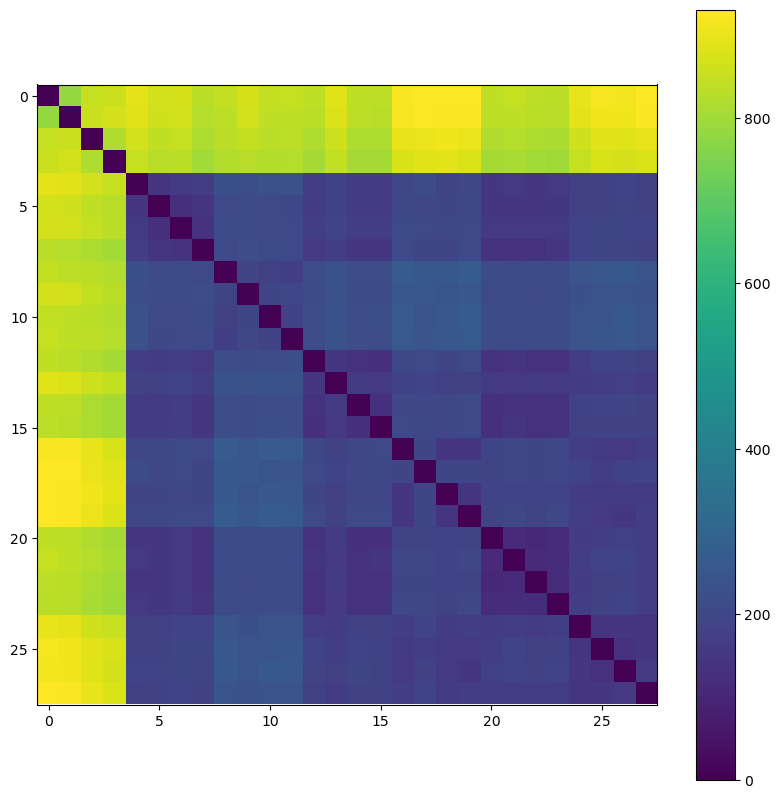

(28, 28)

In [4]:
# visualize the similarity matrix
plt.figure(figsize=(10, 10))
plt.imshow(distances)
plt.colorbar()
plt.show()

# Check if the matrix is has nan values
distances.shape

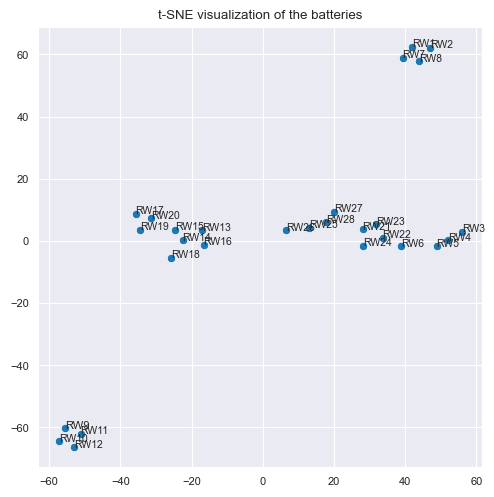

In [17]:
# Reduce the dimensionality of the distance matrix using t-SNE
tsne = TSNE(n_components=2, perplexity=4)
tsne_distances = tsne.fit_transform(distances)

# Visualize the t-SNE distances with sns
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))
plt.title('t-SNE visualization of the batteries')
sns.scatterplot(x=tsne_distances[:, 0], y=tsne_distances[:, 1])
# add labels to the scatter plot
for i, bat in enumerate(dfs_dict.keys()):
    plt.annotate(bat, (tsne_distances[i, 0], tsne_distances[i, 1]))
    # Make annotation a bit smaller to avoid overlap with the points
    plt.rcParams.update({'font.size': 7.5})

plt.tight_layout()
plt.show()



C:\Users\anton\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\anton\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


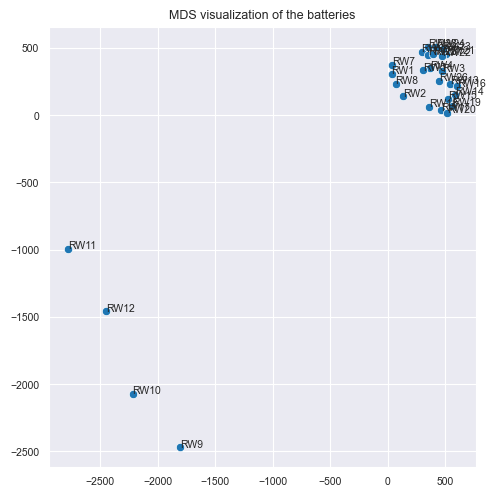

In [19]:
# Reduce the dimensionality of the distance matrix using MDS¨
mds = MDS(n_components=2)
mds_distances = mds.fit_transform(distances)

# Visualize the MDS distances with sns
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))
plt.title('MDS visualization of the batteries')
sns.scatterplot(x=mds_distances[:, 0], y=mds_distances[:, 1])
# add labels to the scatter plot
for i, bat in enumerate(dfs_dict.keys()):
    plt.annotate(bat, (mds_distances[i, 0], mds_distances[i, 1]))
    plt.rcParams.update({'font.size': 7.5})

plt.tight_layout()
plt.show()

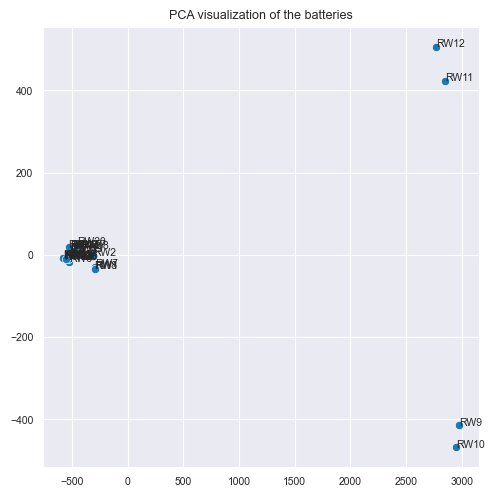

In [20]:
# Now the same but but with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_distances = pca.fit_transform(distances)

# Visualize the PCA distances with sns
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))
plt.title('PCA visualization of the batteries')
sns.scatterplot(x=pca_distances[:, 0], y=pca_distances[:, 1])
# add labels to the scatter plot
for i, bat in enumerate(dfs_dict.keys()):
    plt.annotate(bat, (pca_distances[i, 0], pca_distances[i, 1]))
    plt.rcParams.update({'font.size': 7.5})

plt.tight_layout()
plt.show()